# 时间序列

时间序列(time series)数据都是一种重要的结构化数据形式。在**多个时间点**观察或测量到的**任何事物**都可以**形成一段时间序列**。**很多**时间序列是**固定频率**的,也就是说,数据点是根据**某种规律定期**出现的(比如每15秒、每5分钟、每月出现一次)。时间序列也**可以是不定期**的。时间序列数据的意义取决于具体的应用场景,主要有以下几种:
* 时间戳(timestamp),特定的时刻。
* 固定时期(period),如2007年1月或2010年全年。
* 时间间隔(interval),由起始和结束时间戳表示。时期(period)可以被看做间隔(interval)的特例。
* 实验或过程时间,每个时间点都是相对于特定起始时间的一个度量。例如,从放入烤箱时起,每秒钟饼干的直径。

主要讲解**前3种**时间序列。许多技术都可用于处理实验型时间序列,其索引可能是一个整数或浮点数(表示从实验开始算起已经过去的时间)。最简单也最常见的时间序列都是用时间戳进行索引的。pandas提供了一组**标准**的**时间序列处理工具**和**数据算法**。因此,你可以**高效处理**非常大的时间序列,轻松地进行**切片**/**切块**、**聚合**、对**定期**/**不定期**的时间序列进行**重采样**等。

In [252]:
# -*- coding: utf-8 -*-

from datetime import datetime,timedelta
from dateutil.parser import parse

from pandas import Series,DataFrame
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 日期和时间数据类型及工具

### python内置datetime

#### 基本使用

In [2]:
datetime.now()

datetime.datetime(2018, 4, 19, 10, 24, 53, 543163)

In [3]:
datetime.now() - timedelta(2) # 2代表的是两天

datetime.datetime(2018, 4, 17, 10, 24, 53, 604551)

#### datetime模块的数据类型

* date：以公历形式存储日历信息（年、月、日）；
* time：将时间存储为时、分、秒、毫秒；
* datetime：存储日期和时间；
* timedelta：表示两个datetime之间的时间差（日，秒，毫秒）；

### 字符串和datetime相互转换

#### 日期转字符串

##### str

In [4]:
str(datetime.now())

'2018-04-19 10:24:53.737043'

##### datetime.strftime -- 定制输出格式

In [5]:
datetime.now().strftime('%Y - %m - %d %H : %m : %S')

'2018 - 04 - 19 10 : 04 : 53'

#### 字符串转日期

##### datetime.strptime

In [6]:
datetime.strptime('2012-01-01', '%Y-%m-%d')

datetime.datetime(2012, 1, 1, 0, 0)

#### dateutil解析常用日期格式

##### 解析常见格式

In [7]:
parse('2012-01-02')

datetime.datetime(2012, 1, 2, 0, 0)

In [8]:
parse('2012 01 02 15:23:23')

datetime.datetime(2012, 1, 2, 15, 23, 23)

In [9]:
parse('2012/03/03')

datetime.datetime(2012, 3, 3, 0, 0)

##### 解析日在月前面的情况

In [10]:
parse('2012/28/11', dayfirst=True)

datetime.datetime(2012, 11, 28, 0, 0)

#### pandas.to_datetime -- 特有的NaT是Not a time的意思，时间类型的NA值

In [11]:
pd.to_datetime(['2018/02/02','2000-12-11',None])

DatetimeIndex(['2018-02-02', '2000-12-11', 'NaT'], dtype='datetime64[ns]', freq=None)

#### datetime格式定义

基本格式定义：
* %Y：4位数的年 -- 2012；
* %y：2位数的年 -- 12代表2012；
* %m：2位数的月 -- 02代表2月（1~12）；
* %d：2位数的日 -- 1~31；
* %H：时 -- 00~23（24小时制）；
* %I：时 -- 01~12（12小时制）；
* %M：2位数的分（00~59）；
* %S：秒（00~61）；
* %w：整数表示星期几（0（星期天）~6）；
* %U：每年的第几周（00~53），星期天为一周的第一天，每年第一个星期天之前的那几天统称为第0周；
* %W：每年的第几周（00~53），星期一为一周的第一天，每年第一个星期一之前的那几天统称为第0周；
* %z：以+HHMM或-HHMM表示的UTC时区偏移量，如果时区为native，则返回空字符串；
* %F：%Y-%m-%d，例如2012-01-01；
* %D：%m/%d/%y，例如04/18/12；

针对特定于当前环境：
* %a：星期几的简写；
* %A：星期几的全称；
* %b：月份的简写；
* %B：月份的全称；
* %c：完整的日期和时间，例如“Tue 01 May 2012 04:20:20 pm”；
* %p：不同环境中的AM和PM；
* %x：适用于当前环境的日期格式，例如，在美国，“May 1,2012”会产生“05/01/2012”；
* %X：适用于当前环境的时间格式，例如“04:24:12 pm”；

## 时间序列基础

### 时间戳为索引的Series -- TimeSeries

In [12]:
idxs = [
    datetime(2012,1,2), datetime(2012,1,3), datetime(2012,1,5),
    datetime(2012,1,7), datetime(2012,1,9), datetime(2012,1,11),
]
se = Series(np.arange(6), index=idxs)
se

2012-01-02    0
2012-01-03    1
2012-01-05    2
2012-01-07    3
2012-01-09    4
2012-01-11    5
dtype: int64

In [13]:
se[::2] # 原来这个2是step的意思

2012-01-02    0
2012-01-05    2
2012-01-09    4
dtype: int64

In [14]:
se+se[::2] # 同样的DateTimeIndex也会自动对齐数据并计算

2012-01-02    0.0
2012-01-03    NaN
2012-01-05    4.0
2012-01-07    NaN
2012-01-09    8.0
2012-01-11    NaN
dtype: float64

### TimeSeries索引、选取、子集构造

In [15]:
longer_se = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))

#### 用TimeStamp索引

In [16]:
stamp = se.index[3]
se[stamp]

3

#### 用日期字符串索引

In [17]:
se['2012/01/07']

3

In [18]:
se['20120109']

4

#### 用年份/月份索引多个数据

In [19]:
longer_se['2000'][:10]

2000-01-01   -1.461979
2000-01-02    1.021372
2000-01-03    0.874984
2000-01-04    0.194789
2000-01-05   -0.308912
2000-01-06    0.699641
2000-01-07    0.432394
2000-01-08    1.367155
2000-01-09    0.291578
2000-01-10   -1.120404
Freq: D, dtype: float64

In [20]:
longer_se['2000/02']

2000-02-01    0.119874
2000-02-02    0.232533
2000-02-03    0.850899
2000-02-04    0.773017
2000-02-05    0.779844
2000-02-06    0.024294
2000-02-07   -0.915576
2000-02-08    0.931442
2000-02-09   -1.938687
2000-02-10    0.937196
2000-02-11    0.388117
2000-02-12    0.330768
2000-02-13   -0.148134
2000-02-14    0.601852
2000-02-15   -0.741164
2000-02-16    0.763985
2000-02-17   -1.813520
2000-02-18    0.807511
2000-02-19    1.069462
2000-02-20   -0.272731
2000-02-21    0.784712
2000-02-22   -0.096272
2000-02-23    2.027508
2000-02-24   -1.327148
2000-02-25    1.303461
2000-02-26    0.182967
2000-02-27   -0.642869
2000-02-28    1.958194
2000-02-29    1.746703
Freq: D, dtype: float64

#### 用datetime索引

In [21]:
longer_se[datetime(2000,2,2)]

0.23253301312782132

#### 切片 -- 由于大部分时间序列数据都是按照时间先后排序的,因此你也可以用不存在于该时间序列中的时间戳对其进行切片(即范围查询)

##### 直接切片 -- 可以使用字符串、datetime、TimeStamp

In [22]:
longer_se['2000/02':'2000/04':5] # 2000年2,3,4月每隔5天取一个数据

2000-02-01    0.119874
2000-02-06    0.024294
2000-02-11    0.388117
2000-02-16    0.763985
2000-02-21    0.784712
2000-02-26    0.182967
2000-03-02   -0.402917
2000-03-07    0.948884
2000-03-12   -0.032419
2000-03-17   -0.577075
2000-03-22   -0.170460
2000-03-27    0.578661
2000-04-01   -1.355148
2000-04-06   -0.700976
2000-04-11    0.887596
2000-04-16   -0.462191
2000-04-21   -0.349448
2000-04-26    0.191872
Freq: 5D, dtype: float64

##### 实例方法 -- truncate

In [23]:
longer_se.truncate(after='1/9/2000')

2000-01-01   -1.461979
2000-01-02    1.021372
2000-01-03    0.874984
2000-01-04    0.194789
2000-01-05   -0.308912
2000-01-06    0.699641
2000-01-07    0.432394
2000-01-08    1.367155
2000-01-09    0.291578
Freq: D, dtype: float64

### 带有重复索引的时间序列

In [24]:
idxs = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
se = Series(np.arange(5), index=idxs)
se

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

#### 索引可能出现序列可能出现标量

In [25]:
se['2000/1/1']

0

In [26]:
se['2000/1/2']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

#### 通过is_unique检查index是否唯一

In [27]:
se.index.is_unique

False

#### 聚合

In [28]:
def t(g):
    return Series({
        'mean':g.mean(),
        'count':g.count()
    })
se.groupby(level=0).apply(t).unstack()

,count,mean
2000-01-01,1.0,0.0
2000-01-02,3.0,2.0
2000-01-03,1.0,4.0


## 日期的范围、频率以及移动

pandas中的时间序列一般被认为是**不规则**的,也就是说,它们没
有**固定**的频率。对于大部分应用程序而言,这是无所谓的。但是,它常
常需要以某种**相对固定**的频率进行分析,比如**每日**、**每月**、**每15分钟**等
(这样自然会在时间序列中**引入缺失值**)。pandas有一整套
标准**时间序列频率**以及用于**重采样**、**频率推断**、生成**固定频率日期范
围**的工具。

### 示例 -- 转换为固定频率（每天）的时间序列

In [29]:
idxs = pd.DatetimeIndex(['1/5/2000', '1/8/2000', '1/9/2000', '1/11/2000', '1/15/2000'])
se = Series(np.arange(5), index=idxs)
se

2000-01-05    0
2000-01-08    1
2000-01-09    2
2000-01-11    3
2000-01-15    4
dtype: int64

In [30]:
se.resample('D').sum()

2000-01-05    0.0
2000-01-06    NaN
2000-01-07    NaN
2000-01-08    1.0
2000-01-09    2.0
2000-01-10    NaN
2000-01-11    3.0
2000-01-12    NaN
2000-01-13    NaN
2000-01-14    NaN
2000-01-15    4.0
Freq: D, dtype: float64

### 生成日期范围 -- pd.date_range

pandas.date_range可用于生成指定长度的DatetimeIndex；

#### 指定起始结束时间段 -- 默认按天分割，包头包尾

In [31]:
pd.date_range('2012/01/01','2012/01/05')

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05'],
              dtype='datetime64[ns]', freq='D')

#### 使用periods指定时长 -- 需要指定start/end

In [32]:
pd.date_range(start='2012/01/01',periods=3)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03'], dtype='datetime64[ns]', freq='D')

#### 固定频率 -- freq，例如每月最后一个工作日

In [33]:
pd.date_range('2012/01','2012/06',freq='BM') # BM : business end of mouth

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='BM')

#### 规范化时间，不使用参数自带的时间信息 -- normalize

In [34]:
pd.date_range('2012/01/01 11:01:04',periods=3)

DatetimeIndex(['2012-01-01 11:01:04', '2012-01-02 11:01:04',
               '2012-01-03 11:01:04'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2012/01/01 11:01:04',periods=3,normalize=True) # 去掉了之前参数自带的time信息

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03'], dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

pandas中的频率是由一个**基础频率**(base frequency)和一个**乘数**
组成的。基础频率通常以一个字符串别名表示,比如"**M**"表示**每月**,"**H**"表示**每小时**。对于每个基础频率,都有一个被称为**日期偏移量**
(date offset)的对象与之对应。

#### 基础频率 == 日期偏移量对象

In [36]:
from pandas.tseries.offsets import Hour, Minute

In [37]:
Hour()

<Hour>

In [38]:
2 * Hour()

<2 * Hours>

In [39]:
Hour(2)

<2 * Hours>

#### 不同频率计算

In [40]:
Hour() + Minute()

<61 * Minutes>

In [41]:
2*Hour() - 3*Minute(15)

<75 * Minutes>

#### 使用频率字符串生成日期范围

In [42]:
pd.date_range('2012/01/02',periods=2,freq='1h20min')

DatetimeIndex(['2012-01-02 00:00:00', '2012-01-02 01:20:00'], dtype='datetime64[ns]', freq='80T')

#### freq频率类型

* 均匀分布的频率，比如1h，就是平均每隔一个小时生成一个时间戳；
* 不均匀的频率，比如M、BM，分别表示每月最后一天、每月最后一个工作日，这个不是确定的，跟每个月的具体天数以及星期几有关；

#### freq可取字段

* D：每个日历日；
* B：每个工作日；
* H：每小时；
* T/min：每分钟；
* S：每秒；
* L/ms：每毫秒；
* U：每微秒；
* M：每月最后一个日历日；
* BM：每月最后一个工作日；
* MS：每月第一个日历日；
* BMS：每月第一个工作日；
* W-MON、W-TUE...：每周指定的星期几（MON,TUE,WED,THU,FRI,SAT,SUN）；
* WOM-1MON、WON-2MON...：每月第1/2/3/4个星期几，例如WOM-2MON表示每月第2个星期一；
* Q-JAN、Q-FEB：以指定月份（JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC）结束的年度，每季度最后一个月的最后一个日历日；
* BQ-JAN、BQ-FEB：以指定月份（JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC）结束的年度，每季度最后一个月的最后一个工作日；
* QS-JAN、QS-FEB：以指定月份（JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC）结束的年度，每季度最后一个月的第一个日历日；
* BQS-JAN、BQS-FEB：以指定月份（JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC）结束的年度，每季度最后一个月的第一个工作日；
* A-JAN、A-FEB：每年指定月份的最后一个日历日；
* BA-JAN、BA-FEB：每年指定月份的最后一个工作日；
* AS-JAN、AS-FEB：每年指定月份的第一个日历日；
* BAS-JAN、BAS-FEB：每年指定月份的第一个工作日；

### WOM（Week of Month）日期

In [43]:
pd.date_range('2012/01','2012/06',freq='WOM-2FRI') # 每月第2个星期五

DatetimeIndex(['2012-01-13', '2012-02-10', '2012-03-09', '2012-04-13',
               '2012-05-11'],
              dtype='datetime64[ns]', freq='WOM-2FRI')

### 移动（超前和滞后）数据 -- shifting

移动(shifting)指的是沿着时间轴将数据前移或后移，Series和
DataFrame都有一个shift方法用于执行单纯的前移或后移操作,保持索
引不变。

#### 移动数据 -- 注意，索引是不会动的，因此移动会导致出现NaN

In [44]:
se = Series(np.arange(1,6), index=pd.date_range('2012/01',periods=5,freq='BM'))
se

2012-01-31    1
2012-02-29    2
2012-03-30    3
2012-04-30    4
2012-05-31    5
Freq: BM, dtype: int64

In [45]:
se.shift(2)

2012-01-31    NaN
2012-02-29    NaN
2012-03-30    1.0
2012-04-30    2.0
2012-05-31    3.0
Freq: BM, dtype: float64

In [46]:
se.shift(-3)

2012-01-31    4.0
2012-02-29    5.0
2012-03-30    NaN
2012-04-30    NaN
2012-05-31    NaN
Freq: BM, dtype: float64

#### 计算一个时间序列或多个时间序列(如DataFrame的列)中的百分比变化

In [47]:
se/se.shift(1) - 1 # 其实就是利用移动实现错位计算

2012-01-31         NaN
2012-02-29    1.000000
2012-03-30    0.500000
2012-04-30    0.333333
2012-05-31    0.250000
Freq: BM, dtype: float64

#### 指定freq的数据移动 -- 此时索引会有变化来保证数据不会出现NaN

In [48]:
se.shift(2)

2012-01-31    NaN
2012-02-29    NaN
2012-03-30    1.0
2012-04-30    2.0
2012-05-31    3.0
Freq: BM, dtype: float64

In [49]:
se.shift(2,freq='BM')

2012-03-30    1
2012-04-30    2
2012-05-31    3
2012-06-29    4
2012-07-31    5
Freq: BM, dtype: int64

In [50]:
se.shift(3,freq='D') # 也可以指定其他的freq，这样就可以对数据进行灵活的超前和滞后处理

2012-02-03    1
2012-03-03    2
2012-04-02    3
2012-05-03    4
2012-06-03    5
dtype: int64

### 通过偏移量对日期进行位移

In [51]:
from pandas.tseries.offsets import Day, MonthEnd

#### 日期偏移量跟datetime/TimeStamp计算

In [52]:
dt = datetime(2012,1,5)
dt

datetime.datetime(2012, 1, 5, 0, 0)

In [53]:
dt + Day(5)

Timestamp('2012-01-10 00:00:00')

In [54]:
dt + MonthEnd() # 第一次相加会滚动到第一个满足的日期，比如此处就是滚动到当月末

Timestamp('2012-01-31 00:00:00')

In [55]:
dt + 2*MonthEnd() # 第二次相加

Timestamp('2012-02-29 00:00:00')

#### rollforward/rollback -- 默认+都是rollforward的

In [56]:
dt + MonthEnd()

Timestamp('2012-01-31 00:00:00')

In [57]:
MonthEnd().rollforward(dt)

Timestamp('2012-01-31 00:00:00')

In [58]:
MonthEnd().rollback(dt)

Timestamp('2011-12-31 00:00:00')

#### 结合groupby使用rollforward/rollback

In [59]:
se = Series(np.random.randn(10),index=pd.date_range('1/15/2000', periods=10, freq='10D'))
se

2000-01-15    0.537208
2000-01-25   -1.723215
2000-02-04   -1.693596
2000-02-14   -1.970623
2000-02-24    0.853226
2000-03-05   -1.498395
2000-03-15   -0.210068
2000-03-25   -2.336895
2000-04-04    2.267290
2000-04-14    1.183777
Freq: 10D, dtype: float64

In [60]:
se.groupby(MonthEnd().rollforward).count()

2000-01-31    2
2000-02-29    3
2000-03-31    3
2000-04-30    2
dtype: int64

In [61]:
# 等价于se.groupby(MonthEnd().rollforward)
se.resample('M').count()

2000-01-31    2
2000-02-29    3
2000-03-31    3
2000-04-30    2
Freq: M, dtype: int64

## 时区处理

时间序列处理工作中最让人不爽的就是对时区的处理。尤其是夏
令时(DST)转变,这是一种最常见的麻烦事。就这一点来说,许多人都
选择以协调世界时(UTC,它是格林尼治标准时间(Greenwich
Mean
Time)的接替者,目前已经是国际标准了)来处理时间序列。时区是以
UTC偏移量的形式表示的。例如,夏令时期间,纽约比UTC慢4小时,
而在全年其他时间则比UTC慢5小时。

In [62]:
import pytz

### 获取时区对象

In [65]:
pytz.timezone('US/Eastern')

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [66]:
pytz.common_timezones[:3]

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa']

建议在pandas中**直接使用**时区**字符串**而不是时区**对象**，更直观，pandas内部包装了pytz，本质上是一样的；

### 本地化和转换

In [70]:
idxs = pd.date_range('2012/01/01',periods=5,freq='D')
se = Series(np.arange(5),index=idxs)
se

2012-01-01    0
2012-01-02    1
2012-01-03    2
2012-01-04    3
2012-01-05    4
Freq: D, dtype: int64

#### 本地化 -- tz_localize

##### tz_localize

In [71]:
se.tz_localize('UTC')

2012-01-01 00:00:00+00:00    0
2012-01-02 00:00:00+00:00    1
2012-01-03 00:00:00+00:00    2
2012-01-04 00:00:00+00:00    3
2012-01-05 00:00:00+00:00    4
Freq: D, dtype: int64

##### 在构造数据的时候指定tz来本地化 -- 此种情况下再调用tz_localize会报错

In [72]:
idxs = pd.date_range('2012/01/01',periods=5,freq='D',tz='UTC')
se = Series(np.arange(5),index=idxs)
se

2012-01-01 00:00:00+00:00    0
2012-01-02 00:00:00+00:00    1
2012-01-03 00:00:00+00:00    2
2012-01-04 00:00:00+00:00    3
2012-01-05 00:00:00+00:00    4
Freq: D, dtype: int64

#### 转换 -- tz_convert，注意需要本地化之后才能转换到其他时区

In [74]:
se.tz_convert('US/Eastern') # 比UTC的时间少了一些

2011-12-31 19:00:00-05:00    0
2012-01-01 19:00:00-05:00    1
2012-01-02 19:00:00-05:00    2
2012-01-03 19:00:00-05:00    3
2012-01-04 19:00:00-05:00    4
Freq: D, dtype: int64

### 操作时区意识型TimeStamp对象

#### TimeStamp本地化与转换

In [79]:
ts = pd.Timestamp('2012/01/01 12:00:05')
ts_utc = ts.tz_localize('UTC')
ts_utc.tz_convert('US/Eastern')

Timestamp('2012-01-01 07:00:05-0500', tz='US/Eastern')

#### 直接在构造函数中通过字段指定时区

In [80]:
pd.Timestamp('2012/01/01 12:00:05',tz='UTC').tz_convert('US/Eastern')

Timestamp('2012-01-01 07:00:05-0500', tz='US/Eastern')

### 不同时区之间的计算

In [81]:
idxs = pd.date_range('2012/01/01',periods=10,freq='D')
se = Series(np.arange(10),index=idxs)
se

2012-01-01    0
2012-01-02    1
2012-01-03    2
2012-01-04    3
2012-01-05    4
2012-01-06    5
2012-01-07    6
2012-01-08    7
2012-01-09    8
2012-01-10    9
Freq: D, dtype: int64

In [82]:
# 分别指定不同时区
ts1=se[:5].tz_localize('US/Eastern')
ts2=se[5:].tz_localize('Europe/Moscow')

In [83]:
ts1

2012-01-01 00:00:00-05:00    0
2012-01-02 00:00:00-05:00    1
2012-01-03 00:00:00-05:00    2
2012-01-04 00:00:00-05:00    3
2012-01-05 00:00:00-05:00    4
Freq: D, dtype: int64

In [84]:
ts2

2012-01-06 00:00:00+04:00    5
2012-01-07 00:00:00+04:00    6
2012-01-08 00:00:00+04:00    7
2012-01-09 00:00:00+04:00    8
2012-01-10 00:00:00+04:00    9
Freq: D, dtype: int64

In [86]:
res = ts1+ts2
res.index

DatetimeIndex(['2012-01-01 05:00:00+00:00', '2012-01-02 05:00:00+00:00',
               '2012-01-03 05:00:00+00:00', '2012-01-04 05:00:00+00:00',
               '2012-01-05 05:00:00+00:00', '2012-01-05 20:00:00+00:00',
               '2012-01-06 20:00:00+00:00', '2012-01-07 20:00:00+00:00',
               '2012-01-08 20:00:00+00:00', '2012-01-09 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 时期及其算术运算

### 一般使用及运算

#### Period

In [87]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [88]:
p+2

Period('2009', 'A-DEC')

In [89]:
p-3

Period('2004', 'A-DEC')

In [91]:
p-pd.Period(2002, freq='A-DEC') # 频率相同时，结果就是二者之间的单位数量

5

#### PeriodIndex

##### 使用period_range生成PeriodIndex对象

In [93]:
pi = pd.period_range('2012/01/05','2012/06/30',freq='M')
pi

PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06'], dtype='period[M]', freq='M')

In [94]:
Series(np.arange(len(pi)),index=pi)

2012-01    0
2012-02    1
2012-03    2
2012-04    3
2012-05    4
2012-06    5
Freq: M, dtype: int64

##### 使用构造函数 -- 可以接受一组时间字符串

In [95]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

**Period**和**PeriodIndex**对象都可以通过其**asfreq**方法被转换成别的频率。

#### 一个年度时期,希望将其转换为当年年初或年末的一个月度时期

##### 一般情况

In [97]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [98]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [99]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

##### 起始年份不是一月份

In [106]:
p = pd.Period('2007', freq='A-JUN') # 此时起始年份有变动

In [104]:
p.asfreq('M',how='start')

Period('2006-07', 'M')

In [105]:
p.asfreq('M',how='end')

Period('2007-06', 'M')

##### 高频转低频时的超时期问题

In [117]:
p = pd.Period('2012/06', freq='M')
p

Period('2012-06', 'M')

In [118]:
p.asfreq('A-JUN')

Period('2012', 'A-JUN')

In [119]:
p = pd.Period('2012/07', freq='M')
p

Period('2012-07', 'M')

In [120]:
p.asfreq('A-JUN')

Period('2013', 'A-JUN')

注意：在将**高频率**转换为**低频率**时,**超时期**(superperiod)是由**子时期**(subperiod)所属的位置决定的。例如,在**A-JUN**频率中,月份“**2007年8月**”实际上是属于周期“**2008年**”的。

### 按季度计算的时期频率

**季度型**数据在会计、金融等领域中很常见。许多季度型数据都会涉及“**财年末**”的概念,通常是一年12个月中某月的最后一个**日历日**或**工作日**。就这一点来说,时期"2012Q4"根据财年末的不同会有不同的含义,pandas支持12种可能的季度型频率（根据其实月份的不同）,即Q-JAN到Q-DEC

#### 举个栗子

In [125]:
p = pd.Period('2012Q4',freq='Q-JAN') # 表示以一月份结束的季度年，那么最后一个季度就是11,12,1月组成
p

Period('2012Q4', 'Q-JAN')

In [123]:
p.asfreq('D', how='start') # 得到的就是这一时期的开始一天

Period('2011-11-01', 'D')

In [124]:
p.asfreq('D', how='end') # 得到的就是这一时期的最后一天

Period('2012-01-31', 'D')

上述代码可以通过下图直观理解：
![不同季度型频率之间的转换](images/不同季度型频率之间的切换.png)

#### Period之间的算术运算非常简单，例如要获取该季度倒数第二个工作日下午4点的时间戳

In [143]:
# 'B'表示工作日
# end表示倒数
# -1表示倒数第二个
# 'H'表示将频率切为小时，此时时间不变但是频率变为以小时计算
# +16代表往前走16个小时到下午四点
((p.asfreq('B', how='end') - 1).asfreq('H', how='start')+16).to_timestamp()

Timestamp('2012-01-30 16:00:00')

#### period_range生成季度性范围，再转换为其他频率

In [146]:
idxs = pd.period_range('2012Q1','2013Q2',freq='Q-JAN')
se = Series(np.arange(len(idxs)),index=idxs)
se

2012Q1    0
2012Q2    1
2012Q3    2
2012Q4    3
2013Q1    4
2013Q2    5
Freq: Q-JAN, dtype: int64

In [150]:
# 转换频率为每个季度倒数第二工作日的下班时间，下午六点半
se.index=(idxs.asfreq('B',how='end')-1).asfreq('T',how='start')+18*60+30
se

2011-04-28 18:30    0
2011-07-28 18:30    1
2011-10-28 18:30    2
2012-01-30 18:30    3
2012-04-27 18:30    4
2012-07-30 18:30    5
Freq: T, dtype: int64

### Timestamp和Period的相互转换

#### Timestamp -> Period

In [154]:
idxs = pd.date_range('2012/01/01',periods=6,freq='M')
se = Series(np.arange(len(idxs)),index=idxs)
se

2012-01-31    0
2012-02-29    1
2012-03-31    2
2012-04-30    3
2012-05-31    4
2012-06-30    5
Freq: M, dtype: int64

##### 相同freq

In [160]:
se.to_period() # 等价于to_period('M')

2012-01    0
2012-02    1
2012-03    2
2012-04    3
2012-05    4
2012-06    5
Freq: M, dtype: int64

##### 不同freq

In [161]:
se.to_period('Q-JAN') # 可以看到出现了重叠的索引，高频转低频会有出现这种情况的可能

2012Q4    0
2013Q1    1
2013Q1    2
2013Q1    3
2013Q2    4
2013Q2    5
Freq: Q-JAN, dtype: int64

#### Period -> Timestamp

In [164]:
se.to_period().to_timestamp(how='end') # 因为之前频率是M，最后一个工作日，因此此处需要加个end

2012-01-31    0
2012-02-29    1
2012-03-31    2
2012-04-30    3
2012-05-31    4
2012-06-30    5
Freq: M, dtype: int64

### 通过数组创建PeriodIndex

固定频率的数据集通常会将时间信息分开存放在多个列中。例
如,在下面这个宏观经济数据集中,年度和季度就分别存放在不同的
列中。

#### 加载数据

In [170]:
df = pd.read_csv('https://raw.githubusercontent.com/NemoHoHaloAi/pydata-book/2nd-edition/examples/macrodata.csv')
df.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### 利用DataFrame的Series列数据创建PeriodIndex

In [171]:
index = pd.PeriodIndex(year=df.year, quarter=df.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

#### 使用上述结果index

In [175]:
df.index=index
df.infl[:5] # 可以看到索引已经是季度模式了

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## 重采样及频率转换 -- resample

**重采样**(resampling)指的是将**时间序列**从一个频率**转换**到另一个频率的**处理过程**。将**高**频率数据**聚合**到**低**频率（比如freq从'D'->'M'）称为**降采样(downsampling)**,而将**低**频率数据转换到**高**频率（比如freq从'H'->'D'）则称为**升采样(upsampling)**。并不是所有的重采样都能被划分到这两个大类中。例如,将W-WED(每周三)转换为W-FRI既不是降采样也不是升采样。

### resample

#### 举个栗子

In [179]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(len(rng)), index=rng)
ts[:5]

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int64

In [191]:
ts.resample('M').count() # 重采样（降采样，出现重复索引），在原基础上采样每个月最后一天，从1月开始（默认向后找第一个满足的）

2000-01-31    31
2000-02-29    29
2000-03-31    31
2000-04-30     9
Freq: M, dtype: int64

In [194]:
ts.resample('M',kind='period').mean() # 重采样同时将索引改为Period形式

2000-01    15
2000-02    45
2000-03    75
2000-04    95
Freq: M, dtype: int64

#### resample方法参数说明

* freq：表示重采样频率的字符串或者DateOffset，例如‘M’、‘5min’或Hour(3)；
* how='mean'：用于产生聚合的函数名或数组函数，默认为’mean‘，常用有’first‘，’last‘，’median’，‘max’，‘min’；
* axis=0：重采样的轴，默认为0，即索引；
* fill_method=None：升采样时如何插值，比如‘ffill’、‘bfill’，默认不插值；
* closed='right'：在降采样中，各时间段哪一端是闭合包含的，默认是‘right’，可选‘left’；
* label='right'：在降采样中，如何设置聚合值的标签，例如9:30到9:35之间的时间点是表示为9:30（left）还是9:35（right）；
* loffset=None：面元标签的时间校正值，比如‘-1s’、Second(-1)表示调早1s；
* limit=None：在前向或者后向填充时，限制的最大时期数，比如升采样中出现连续10个空值需要差值，如果设置了limit为5，那么仅有5个会被差值；
* kind=None：聚合到时期（‘Period’）还是时间戳（‘TimeStamp’），默认聚合到时间序列的索引；
* convention=None：当重采样时期时，将低频率转换到高频率采用的约定（‘start’、‘end’，就是Period中的how参数），默认为end；

### 降采样

将数据聚合到规整的低频率是一件非常普通的时间序列处理任
务。待聚合的数据不必拥有固定的频率,期望的频率会自动定义聚合
的面元边界,这些面元用于将时间序列拆分为多个片段。例如,要转换
到月度频率('M'或'BM'),数据需要被划分到多个单月时间段中。各时
间段都是**半开放**的。一个数据点**只能**属于一个时间段,所有时间段的
**并集**必须能**组成整个时间帧**。

在用resample对数据进行降采样时,需要考虑两样东西:
* 各区间哪边是闭合的。
* 如何标记各个聚合面元,用区间的开头还是末尾。

#### 举个栗子

In [195]:
idxs = pd.date_range('2012/01/01',periods=10,freq='T')
se = Series(np.arange(len(idxs)),index=idxs)
se

2012-01-01 00:00:00    0
2012-01-01 00:01:00    1
2012-01-01 00:02:00    2
2012-01-01 00:03:00    3
2012-01-01 00:04:00    4
2012-01-01 00:05:00    5
2012-01-01 00:06:00    6
2012-01-01 00:07:00    7
2012-01-01 00:08:00    8
2012-01-01 00:09:00    9
Freq: T, dtype: int64

In [207]:
se.resample('5T').mean() # 默认closed、label都是left

2012-01-01 00:00:00    2
2012-01-01 00:05:00    7
Freq: 5T, dtype: int64

In [209]:
se.resample('5T',closed='right').count()

2011-12-31 23:55:00    1
2012-01-01 00:00:00    5
2012-01-01 00:05:00    4
Freq: 5T, dtype: int64

In [206]:
se.resample('5T',label='right').mean()

2012-01-01 00:05:00    2
2012-01-01 00:10:00    7
Freq: 5T, dtype: int64

下图展示了1分钟到5分钟的转换：

![1分钟到5分钟的转换](images/1分钟到5分钟转换.png)

#### 通过移动更清晰看到时期代表的区间开头

In [215]:
se.resample('5T',closed='right').count().shift(periods=1,freq='S',axis=0)

2011-12-31 23:55:01    1
2012-01-01 00:00:01    5
2012-01-01 00:05:01    4
Freq: 5T, dtype: int64

### OHLC重采样 -- O代表开盘open，H代表最大值，L代表最小值，C代表收盘close

In [219]:
Series(np.random.randn(len(idxs)),index=idxs).resample('5T').ohlc()

,open,high,low,close
2012-01-01 00:00:00,0.068126,1.885967,-1.808362,1.844748
2012-01-01 00:05:00,0.786660,0.786660,-1.179998,0.292313


### 通过groupby进行重采样

另一种降采样的办法是使用pandas的groupby功能。例如,你打算
根据月份或星期几进行分组,只需传入一个能够访问时间序列的索引
上的这些字段的函数即可。

In [220]:
idxs = pd.date_range('2012/01',periods=10,freq='10D')
se = Series(np.arange(len(idxs)),index=idxs)
se

2012-01-01    0
2012-01-11    1
2012-01-21    2
2012-01-31    3
2012-02-10    4
2012-02-20    5
2012-03-01    6
2012-03-11    7
2012-03-21    8
2012-03-31    9
Freq: 10D, dtype: int64

In [222]:
se.groupby(lambda x:x.month).count() # 利用groupby利用月份函数来降采样

1    4
2    2
3    4
dtype: int64

### 升采样和插值

在将数据从低频率转换到高频率时，就不需要聚合了，此时考虑的应该是插值问题；

In [223]:
idxs = pd.date_range('2012/01',periods=5,freq='M')
se = Series(np.arange(len(idxs)),index=idxs)
se

2012-01-31    0
2012-02-29    1
2012-03-31    2
2012-04-30    3
2012-05-31    4
Freq: M, dtype: int64

In [230]:
se.resample('15D').sum()

2012-01-31    0.0
2012-02-15    1.0
2012-03-01    NaN
2012-03-16    NaN
2012-03-31    2.0
2012-04-15    NaN
2012-04-30    3.0
2012-05-15    NaN
2012-05-30    4.0
Freq: 15D, dtype: float64

In [231]:
se.resample('15D').bfill()

2012-01-31    0
2012-02-15    1
2012-03-01    2
2012-03-16    2
2012-03-31    2
2012-04-15    3
2012-04-30    3
2012-05-15    4
2012-05-30    4
Freq: 15D, dtype: int64

### 通过时期进行重采样

In [232]:
df = DataFrame(np.random.randn(24, 4),
               index=pd.period_range('1-2000', '12-2001', freq='M'),
               columns=['Colorado', 'Texas', 'New York', 'Ohio'])
df.head(5)

,Colorado,Texas,New York,Ohio
2000-01,-0.555819,0.208614,-0.226407,0.232877
2000-02,0.739457,0.162469,-0.282968,-0.471414
2000-03,-1.042966,-0.559358,-0.028650,1.126615
2000-04,0.360114,-0.822485,-0.577344,0.276831
2000-05,0.995286,0.459154,1.110143,-0.956211


#### 降采样

In [236]:
df.resample('A-DEC').mean() # 频率降为年

,Colorado,Texas,New York,Ohio
2000,-0.318550,-0.188298,-0.158361,-0.055233
2001,0.116617,0.326965,-0.115159,0.100487


#### 升采样

升采样要稍微麻烦一些,因为你必须决定在新频率中各区间的哪
端用于放置原来的值,就像asfreq方法那样。convention参数默认
为'end',可设置为'start'。

In [248]:
df[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.555819,0.208614,-0.226407,0.232877
2000-02,0.739457,0.162469,-0.282968,-0.471414
2000-03,-1.042966,-0.559358,-0.028650,1.126615
2000-04,0.360114,-0.822485,-0.577344,0.276831
2000-05,0.995286,0.459154,1.110143,-0.956211


In [247]:
df.resample('10D').ffill()[:5]

,Colorado,Texas,New York,Ohio
2000-01-01,-0.555819,0.208614,-0.226407,0.232877
2000-01-11,-0.555819,0.208614,-0.226407,0.232877
2000-01-21,-0.555819,0.208614,-0.226407,0.232877
2000-01-31,-0.555819,0.208614,-0.226407,0.232877
2000-02-10,0.739457,0.162469,-0.282968,-0.471414


### 重采样要注意的地方

由于时期指的是时间区间,所以升采样和降采样的规则就比较严格:

* 在**降采样**中,**目标频率**必须是**源频率**的**子时期**(subperiod)。
* 在**升采样**中,**目标频率**必须是**源频率**的**超时期**(superperiod)。

如果不满足这些条件,就会引发异常。这主要影响的是按季、年、周计算的频率。例如,由**Q-MAR**定义的时间区间只能**升采样**为**A-MAR**、**A-JUN**、**A-SEP**、**A-DEC**等。

## 时间序列绘图

### 加载数据

In [315]:
stock = pd.read_csv('https://raw.githubusercontent.com/NemoHoHaloAi/pydata-book/2nd-edition/examples/stock_px.csv',
                    index_col=0,parse_dates=True)[['AAPL','IBM','MSFT','SPX']]
stock_spx = stock[['SPX']]
stock = stock[['AAPL','IBM','MSFT']]
stock.head(5)

,AAPL,IBM,MSFT
1990-02-01,7.86,16.79,0.51
1990-02-02,8.00,16.89,0.51
1990-02-05,8.18,17.32,0.51
1990-02-06,8.12,17.56,0.51
1990-02-07,7.77,17.93,0.51


### 直接plot绘图

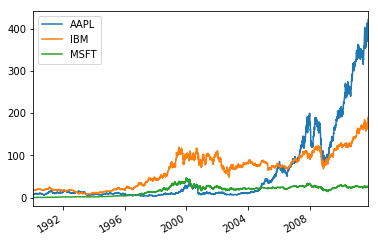

In [316]:
stock.plot()

#### 通过loc索引08年金融危机/09年时的情况绘制

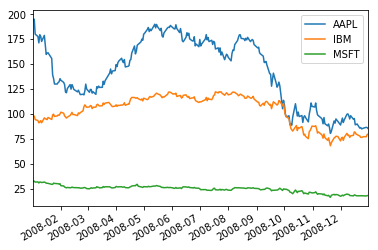

In [317]:
stock.loc['2008'].plot() # loc代替ix索引行

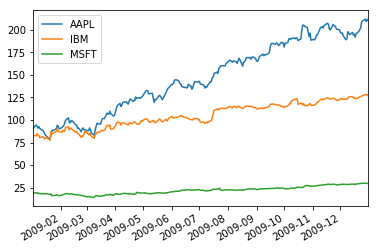

In [264]:
stock.loc['2009'].plot() # loc代替ix索引行

#### 苹果公司单月股票

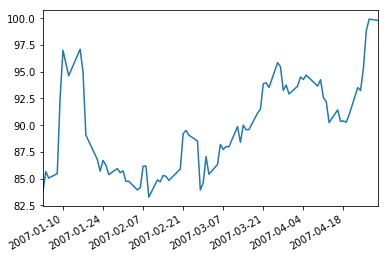

In [265]:
stock.loc['2007/01':'2007/04'].AAPL.plot()

#### 08年季度微软股票

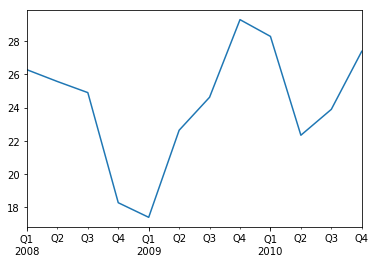

In [273]:
stock.MSFT.resample('Q-DEC').ffill().loc['2008':'2010'].plot()

## 移动窗口函数

在移动窗口(可以带有指数衰减权数)上计算的各种统计函数也
是一类常见于时间序列的数组变换。我将它们称为移动窗口函数
(moving window function),其中还包括那些窗口不定长的函数(如指
数加权移动平均)。跟其他统计函数一样,移动窗口函数也会自动排除
缺失值。

### 举个栗子

#### 最简单的rolling().mean()

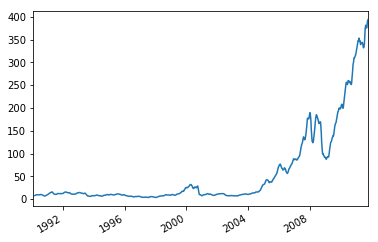

In [279]:
stock.AAPL.rolling(window=25).mean().plot()

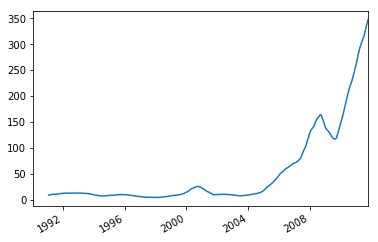

In [280]:
stock.AAPL.rolling(window=250).mean().plot()

**理解**：能够看到在窗口大小从25->250时，整个线条变得更加圆滑，这样理解，这个窗口大小实际上就是计算平均值的一个范围，比如一下数列：

    1, 2, 3, 4, 5

如果设置window=3求mean的话，结果应该是：

    1/1, (1+2)/2, (1+2+3)/3, (2+3+4)/3, (3+4+5)/3
    即：
    1, 1.5, 2, 3, 4

#### 验证一下猜想

In [285]:
# 注意：如果不设置min_periods，前两个结果由于不足3个都是NaN，该字段还有助于避免由确实数据带来的计算问题，比如需求是10个，但是有一个NaN
Series(np.arange(1,6)).rolling(window=3,min_periods=1).mean()

0    1.0
1    1.5
2    2.0
3    3.0
4    4.0
dtype: float64

#### 各股价60日均线

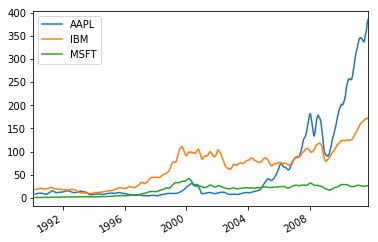

In [286]:
stock.rolling(window=60,min_periods=30).mean().plot()

### 指数加权函数 -- 对数据的使用更相信近期的数据

另一种使用固定大小窗口及相等权数观测值的办法是,定义一个**衰减因子**(decay factor)常量,以便使**近期**的观测值拥有**更大的权数**。用数学术语来讲,如果mat是时间t的移动平均结果,x是时间序列,结果中的各个值可用mat =a\*mat-1+(a -1)\*x-t进行计算,其中a为衰减因子。衰减因子的定义方式有很多,比较流行的是使用**时间间隔**(span),它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口(simplemoving window)函数。

由于指数加权统计会赋予**近期**的观测值**更大的权数**,因此相对于等权统计,它能“适应”**更快**的变化。

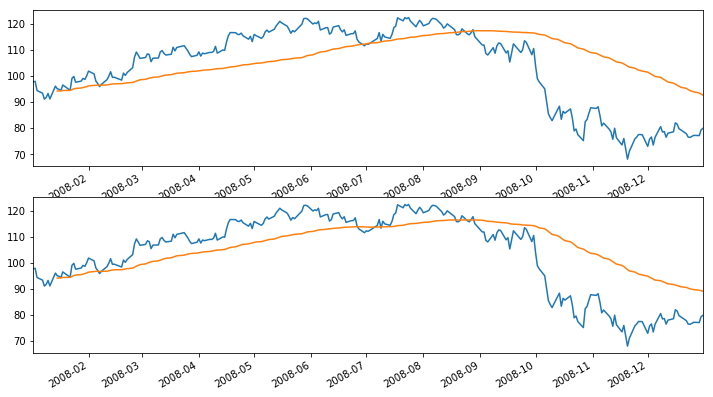

In [303]:
fig, axes = plt.subplots(2,1,figsize=(12,7))
stock_ibm_08 = stock.IBM.loc['2008']
stock_ibm_08.plot(ax=axes[0])
stock_ibm_08.plot(ax=axes[1])

stock_60_normal = stock_ibm_08.rolling(window=100,min_periods=10).mean()
stock_60_normal.plot(ax=axes[0])

stock_60_ewm = stock_ibm_08.ewm(span=100,min_periods=10).mean()
stock_60_ewm.plot(ax=axes[1])

可以看到：在加权统计中，均线更接近实际的数值；

### 二元移动窗口函数 -- 例如相关系数、协方差等

In [321]:
pc_spx = stock_spx.pct_change() # 计算得到标准普尔500系数的百分比变化数据
pc_all = stock.pct_change() # 计算得到三支股票的百分比变化数据

In [331]:
pc_spx[:5]

,SPX
1990-02-01,NaN
1990-02-02,0.006478
1990-02-05,0.002810
1990-02-06,-0.006599
1990-02-07,0.012407


In [328]:
pc_all[:5]

,AAPL,IBM,MSFT
1990-02-01,NaN,NaN,NaN
1990-02-02,0.017812,0.005956,0.0
1990-02-05,0.022500,0.025459,0.0
1990-02-06,-0.007335,0.013857,0.0
1990-02-07,-0.043103,0.021071,0.0


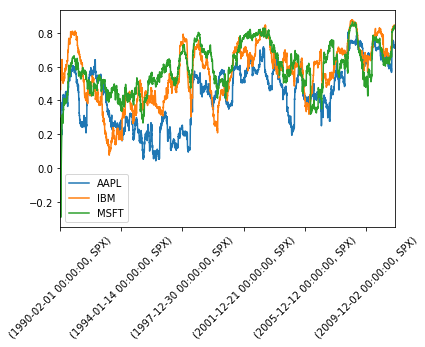

In [360]:
# 最新用法，使用旧的方法时会提醒使用新方法的方式，里面有提到需要设置pairwise=100
pc_all.rolling(window=125,min_periods=10).corr(pc_spx,pairwise=100).plot(rot=45)

### 自定义移动窗口函数 -- apply

rolling_apply函数使你能够在移动窗口上应用自己设计的数组函
数。唯一要求的就是:该函数要能从数组的各个片段中产生单个值(即
约简)。比如说,当我们用rolling_quantile计算样本分位数时,可能对样
本中特定值的百分等级感兴趣。scipy.stats.percentileofscore函数就能达
到这个目的。

#### 计算分位数的移动窗口函数

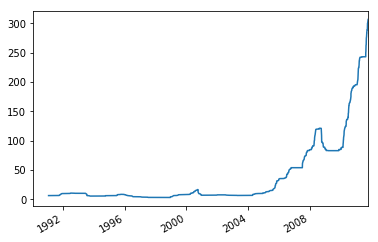

In [400]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: np.percentile(x, 2)
# result = stock.AAPL.rolling(window=250).quantile(0.02)
# 上述语句和下述是等价的，不知道为啥percentileofscore用起来有点问题，可能改版了
result = stock.AAPL.rolling(window=250).apply(score_at_2percent)
result.plot()

#### 自己写个窗口函数 -- 统计08年AAPL股票每10天的股票变化

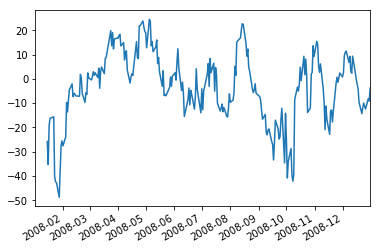

In [410]:
def my_window_func(x):
    # x就是rolling分组的数据，比如window是250，那么x就是一个长度为250的数据集合
    return x[-1]-x[0] # 十天内的股票变化值
stock.loc['2008'].AAPL.rolling(window=10).apply(my_window_func).plot()

可以看到：跌多升少，不愧是金融危机啊；

## 性能和内存使用方面的注意事项

### 内存

Timestamp和Period都是以64位整数表示的(即NumPy的
datetime64数据类型)。也就是说,对于每个数据点,其时间戳需要占用
8字节的内存。因此,含有一百万个float64数据点的时间序列需要占用
大约16MB的内存空间。由于pandas会尽量在多个时间序列之间共享索
引,所以创建现有时间序列的视图不会占用更多内存 译注11 。此外,低
频率索引(日以上)会被存放在一个中心缓存中,所以任何固定频率的
索引都是该日期缓存的视图。所以,如果你有一个很大的低频率时间
序列,索引所占用的内存空间将不会很大。

### 性能

In [413]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts.describe()

count    1.000000e+07
mean    -1.229476e-04
std      9.999352e-01
min     -5.263372e+00
25%     -6.744093e-01
50%     -2.201290e-04
75%      6.743262e-01
max      5.072502e+00
dtype: float64

In [416]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 90.8 ms per loop


In [417]:
%timeit ts.resample('15s').ohlc()

10 loops, best of 3: 92.1 ms per loop


In [418]:
%timeit ts.resample('2s').ohlc()

10 loops, best of 3: 95.3 ms per loop


可以看到：转换到的频率越高，耗时越长，比如转换到15min要快过15s，15s要快过2s；